In [1]:
import ase
import numpy as np
from ase.visualize import view
import struct_statistics as stats
import matplotlib.pyplot as p
import soaputils as su
%matplotlib

Using matplotlib backend: TkAgg


In [ ]:
# structure resulting from svd optimization (l1-norm/l2-norm)
# periodic boundaries
struct1 = ase.io.read("res_structs/svd_normd_pbc.cfg")
view(struct1)
hist, distBins = stats.computePPDF(struct1,binSize=0.1,numBins=80,projectedAxis=None)
h = p.plot(distBins,hist)
p.xlabel("Distance in A")
p.legend(h,['Zr-Zr','Zr-Cu','Cu-Cu'])
print("Density of struct: %f (A⁻3)" %stats.density(struct1))

In [ ]:
# structure resulting from svd optimization (l1-norm/l2-norm) with different starting points
struct2 = ase.io.read("res_structs/svd_normd_pbc_2.cfg")
view(struct2)
hist, distBins = stats.computePPDF(struct2,binSize=0.1,numBins=80,projectedAxis=None)
h = p.plot(distBins,hist)
p.xlabel("Distance in A")
p.legend(h,['Zr-Zr','Zr-Cu','Cu-Cu'])
print("Density of struct: %f (A⁻3)" %stats.density(struct2))

In [ ]:
# structure resulting from svd optimization (l1-norm/l2-norm)
# non periodic boundaries
struct3 = ase.io.read("res_structs/svd_normd_npbc.cfg")
view(struct3)
hist, distBins = stats.computePPDF(struct3,binSize=0.1,numBins=80,projectedAxis=None)
h = p.plot(distBins,hist)
p.xlabel("Distance in A")
p.legend(h,['Zr-Zr','Zr-Cu','Cu-Cu'])
print("Density of struct: %f (A⁻3)" %stats.density(struct3))

Density of struct: 0.030000 (A⁻3)
Cell([13.263524, 13.263524, 13.263524], pbc=True)


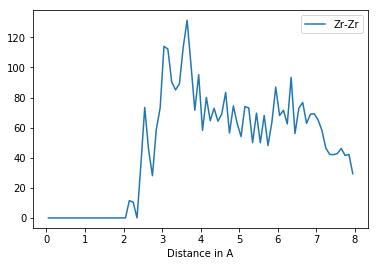

In [2]:
struct = ase.io.read("res_structs/svd_normd_C70.cfg")
view(struct)
hist, distBins = stats.computeRDF(struct,binSize=0.1,numBins=80)
h = p.plot(distBins,hist)
p.xlabel("Distance in A")
p.legend(h,['Zr-Zr','Zr-Cu','Cu-Cu'])
print("Density of struct: %f (A⁻3)" %stats.density(struct))
print(struct.get_cell())

Density of struct: 0.057656 (A⁻3)


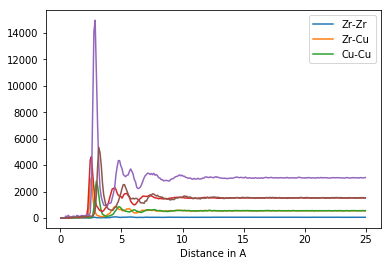

In [3]:
struct4 = ase.io.read("res_structs/dump_50A.cfg")
view(struct4)
#hist, distBins = stats.computePPDF(struct4,binSize=0.1,numBins=250,projectedAxis=None)
hist, distBins = stats.computeRDF(struct4,binSize=0.1,numBins=250)
h = p.plot(distBins,hist)
p.xlabel("Distance in A")
p.legend(h,['Zr-Zr','Zr-Cu','Cu-Cu'])
print("Density of struct: %f (A⁻3)" %stats.density(struct4))

Density of struct: 0.030000 (A⁻3)
Cell([13.263524026321305, 13.263524026321305, 13.263524026321305], pbc=True)


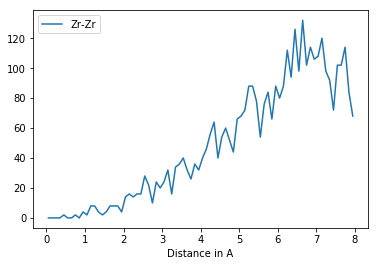

In [2]:
struct5 = su.gen_struct(Natoms=70,seed=50)
struct5.set_pbc((1,1,1))
view(struct5)
hist, distBins = stats.computePPDF(struct5,binSize=0.1,numBins=80,projectedAxis=None)
h = p.plot(distBins,hist)
p.xlabel("Distance in A")
p.legend(h,['Zr-Zr','Zr-Cu','Cu-Cu'])
print("Density of struct: %f (A⁻3)" %stats.density(struct5))
print(struct5.get_cell())

Density of struct: 0.030000 (A⁻3)
Cell([14.938016, 14.938016, 14.938016], pbc=True)
(80, 1)
(80,)


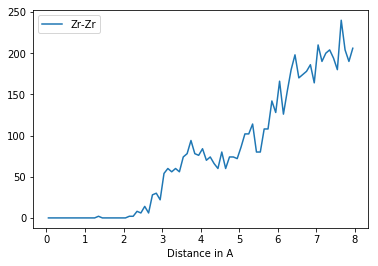

In [3]:
struct = ase.io.read("res_structs/size_test/batchC100.cfg")
view(struct)
hist, distBins = stats.computePPDF(struct,binSize=0.1,numBins=80,projectedAxis=None)
h = p.plot(distBins,hist)
p.xlabel("Distance in A")
p.legend(h,['Zr-Zr','Zr-Cu','Cu-Cu'])
print("Density of struct: %f (A⁻3)" %stats.density(struct))
print(struct.get_cell())
print(np.shape(hist))
print(np.shape(distBins))

In [25]:
l_list = [0,1,3,5,7,9,5,5,5,5,5,5,5,5,5,5,5,5]
n_list = [5,5,5,5,5,5,2,4,5,8,10,12,5,5,5,5,5,5]
r_list = [10,10,10,10,10,10,10,10,10,10,10,10,2,4,5,8,10,12] 

In [39]:
for i in np.arange(12,17+1):
    filename = "batch" + "l" + str(l_list[i]) + "n" + str(n_list[i]) + "r" + str(r_list[i]) + ".cfg"
    struct = ase.io.read("res_structs/param_test/" + filename)
    hist, distBins = stats.computePPDF(struct,binSize=0.1,numBins=80)
    h = p.plot(distBins,hist,label=filename)
p.xlabel("Distance in A")
p.legend()
p.show()

In [29]:
# average over structs in the batch of 10
%matplotlib
Nbins = 150
hists = np.zeros((10,Nbins))
for i in np.arange(10):
    filename = "batch" + str(i) + ".cfg"
    struct = ase.io.read("res_structs/x0_test/" + filename)
    hist, distBins = stats.computePPDF(struct,binSize=0.1,numBins=Nbins,projectedAxis=None)
    #hist, distBins = stats.computeRDF(struct,binSize=0.1,numBins=Nbins)
    hists[i,:] = hist[:,0]
    #hists[i,:] = hist[:]
meanHist = np.mean(hists,0)
h = p.plot(distBins[1:],meanHist[1:])
p.xlabel("Distance in A")
p.legend(h,['Zr-Zr','Zr-Cu','Cu-Cu'])
print(struct.get_cell())

Using matplotlib backend: TkAgg
Cell([13.263524, 13.263524, 13.263524], pbc=True)


In [28]:
# average PDF/RDF of random structs
N = 500
Nbins = 150
hists = np.zeros((N,Nbins))
for i in np.arange(N):
    struct = su.gen_struct(70,seed=50+i)
    struct.set_pbc((1,1,1))
    hist, distBins = stats.computePPDF(struct,binSize=0.1,numBins=Nbins,projectedAxis=None)
    #hist, distBins = stats.computeRDF(struct,binSize=0.1,numBins=Nbins)
    hists[i,:] = hist[:,0]
    #hists[i,:] = hist[:]
meanHist = np.mean(hists,0)/N
h = p.plot(distBins,meanHist)
p.xlabel("Distance in A")
p.legend(h,['Zr-Zr','Zr-Cu','Cu-Cu'])
cell70 = struct.get_cell()
print(struct.get_cell())


Cell([13.263524026321305, 13.263524026321305, 13.263524026321305], pbc=True)


In [30]:
# average PDF/RDF of dump file structs with single species
N = 50
Nbins = 150
hists = np.zeros((N,Nbins))
struct_dump = ase.io.read("res_structs/dump_50A.cfg")
nums = struct_dump.get_atomic_numbers()
nums = [1 for i in nums]
struct_dump.set_atomic_numbers(nums)

for i in np.arange(N):
    struct = su.ran_sample(struct_dump,(13.26,13.26,13.26),seed=50+i)
    struct.set_pbc((1,1,1))
    hist, distBins = stats.computePPDF(struct,binSize=0.1,numBins=Nbins,projectedAxis=None)
    #hist, distBins = stats.computeRDF(struct,binSize=0.1,numBins=Nbins)
    hists[i,:] = hist[:,0]
    #hists[i,:] = hist[:]
meanHist = np.mean(hists,0)/N
h = p.plot(distBins,meanHist)
p.xlabel("Distance in A")
p.legend(h,['Zr-Zr','Zr-Cu','Cu-Cu'])
print(struct.get_cell())

Cell([13.26, 13.26, 13.26], pbc=True)


In [2]:
# results of the run_params.py file
l_time = [1695,1697,1791,1845,1948,2077]
n_time = [993,1559,1832,3097,3380,3927]
r_time = [1868,1770,1730,1678,1587,1492]
l_feval = [15192,15192,15192,15192,15192,15192]
n_feval = [15192,15192,15192,15192,17302,15614]
r_feval = [15192,15192,15192,15192,15192,15192]
l_it = [71,71,71,71,70,71]
n_it = [67,68,64,31,13,40]
r_it = [71,69,70,71,61,71]
lx = [0,1,3,5,7,9]
nx = [2,3,5,8,10,12]
rx = [2,4,5,8,10,12]

In [17]:
%matplotlib
fig, axs = p.subplots(1,3,figsize=[6,4],sharey=True)

axs[0].plot(lx,l_time)
axs[0].set_xlabel('l_max')
axs[0].set_ylabel('time [s]')
axs[0].set_xticks(lx,lx)

axs[1].plot(nx,n_time)
axs[1].set_xlabel('n_max')
#axs[1].set_ylabel('time [s]')
axs[1].set_xticks(nx,nx)

axs[2].plot(rx,r_time)
axs[2].set_xlabel('r_cut [A]')
#axs[2].set_ylabel('time [s]')
axs[2].set_xticks(rx,rx)

Using matplotlib backend: TkAgg


In [18]:
# results of the run_sizes.py file
nAx = [10,20,30,40,50,60,70,80,90,100,150,200]
nA_times = [1567,1270,1633,1707,1761,1744,1812,1850,1949,2010,2029,2070]
nA_it = [356,78,128,82,91,82,71,62,55,49,33,24]

In [21]:
p.plot(nAx,nA_times)
p.xlabel('computation time [s]')
p.ylabel('number of atoms')

Text(0, 0.5, 'number of atoms')

In [3]:
%matplotlib

Using matplotlib backend: TkAgg


In [6]:

#struct_dump = ase.io.read("res_structs/dump_50A.cfg")
#struct = su.ran_sample(struct_dump,(15,15,15))
struct = ase.io.read("res_structs/x0_test/batch0.cfg")
struct.set_pbc((1,1,1))
#view(struct)

pdf, distBins = stats.simpleRDF(struct,numBins=100,rCut=20)
print(len(struct))
print(np.shape(pdf))
p.plot(distBins,pdf)

70
(100,)


In [15]:
print(distBins)

[ 2.20727558  2.43634489  2.66541419  2.89448349  3.12355279  3.35262209
  3.5816914   3.8107607   4.03983     4.2688993   4.49796861  4.72703791
  4.95610721  5.18517651  5.41424581  5.64331512  5.87238442  6.10145372
  6.33052302  6.55959232  6.78866163  7.01773093  7.24680023  7.47586953
  7.70493884  7.93400814  8.16307744  8.39214674  8.62121604  8.85028535
  9.07935465  9.30842395  9.53749325  9.76656255  9.99563186 10.22470116
 10.45377046 10.68283976 10.91190907 11.14097837 11.37004767 11.59911697
 11.82818627 12.05725558 12.28632488 12.51539418 12.74446348 12.97353278
 13.20260209 13.43167139 13.66074069 13.88980999 14.1188793  14.3479486
 14.5770179  14.8060872  15.0351565  15.26422581 15.49329511 15.72236441
 15.95143371 16.18050301 16.40957232 16.63864162 16.86771092 17.09678022
 17.32584953 17.55491883 17.78398813 18.01305743 18.24212673 18.47119604
 18.70026534 18.92933464 19.15840394 19.38747324 19.61654255 19.84561185
 20.07468115 20.30375045 20.53281976 20.76188906 20.